In [1]:
%matplotlib inline
from keras.models import Sequential, load_model, model_from_json
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


# Inicializacion

In [2]:
'''
1. model_baseline_v1
2. model_v1
3. model_baseline_dropout
4. model_dropout
5. model_baseline_tf_learning
6. model_tf_learning
'''

model_select = 4

if model_select == 1:
    name_model = 'model_baseline_v1.hdf5'
elif model_select == 2:
    name_model = 'model_v1.hdf5'
elif model_select == 3:
    name_model = 'model_baseline_dropout.h5'
elif model_select == 4:
    name_model = 'model_dropout.hdf5'
elif model_select == 5:
    name_model = 'model_baseline_tf_learning.h5'
elif model_select == 6:
    name_model = 'model_tf_learning.hdf5'

name_model = './Modelos/'+name_model


In [3]:
def f_cargar_modelo2():
    from keras.models import model_from_json
    # load json and create model
    json_file = open('model_dropout.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("model_weights_dropout.h5")
    return loaded_model

def f_cargar_modelo(name_model):
    model = load_model(name_model)
    return model



In [4]:
# Rutas de interes
path_dataset = '/Users/macbook/GoogleDrive/Emotion_detection/Dataset/'
path_train = path_dataset + 'train'
path_validation = path_dataset + 'validation'

# Info data
num_classes = 7
labels = ['angry','disgust','fear','happy','neutral','sad','surprise']
w,h = 48,48
batch_size = 512
nb_train_samples = 28821
nb_validation_samples = 7066

In [5]:
# Inicializndao el generador de imagenes
if model_select in [1,2,3,4]: 
    val_datagen = ImageDataGenerator(rescale=1./255)
    val_generator = val_datagen.flow_from_directory(
        directory=path_validation,
        target_size=(w,h),
        color_mode='grayscale',
        class_mode='categorical')
elif model_select == 5:
    val_datagen = ImageDataGenerator(rescale=1./255)
    val_generator = val_datagen.flow_from_directory(
        directory=path_validation,
        target_size=(w,h),
        color_mode='rgb',
        class_mode='categorical')
elif model_select == 6:
    w,h = 128,128
    val_datagen = ImageDataGenerator(rescale=1./255)
    val_generator = val_datagen.flow_from_directory(
        directory=path_validation,
        target_size=(w,h),
        color_mode='rgb',
        class_mode='categorical')

Found 7066 images belonging to 7 classes.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Confusion Matrix
[[126  11  60 253 205 180 125]
 [  9   1   7  32  22  20  20]
 [111  14  67 278 246 159 143]
 [216  29 128 510 438 257 247]
 [151  16  71 319 300 195 164]
 [139  12  74 329 252 205 128]
 [ 85   9  44 238 184 130 107]]
Classification Report
              precision    recall  f1-score   support

       angry       0.15      0.13      0.14       960
     disgust       0.01      0.01      0.01       111
        fear       0.15      0.07      0.09      1018
       happy       0.26      0.28      0.27      1825
     neutral       0.18      0.25      0.21      1216
         sad       0.18      0.18      0.18      1139
    surprise       0.11      0.13      0.12       797

    accuracy                           0.19      7066
   macro avg       0.15      0.15      0.15      7066
weighted avg       0.18      0.19      0.18      7066



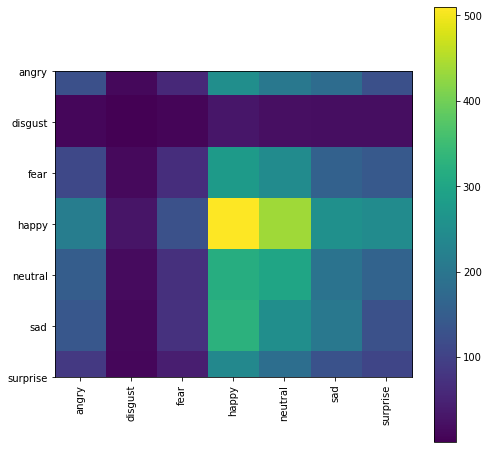

In [6]:
# cargo el modelo
model = f_cargar_modelo(name_model)

class_labels = val_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(val_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(val_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [7]:
result = model.evaluate(val_generator)
for name, value in zip(model.metrics_names, result):
    print(name, value)

221/221 [==============================] - 45s 205ms/step
loss 0.8807308673858643
accuracy 0.6304839849472046


In [12]:
model.evaluate(val_generator)

221/221 [==============================] - 50s 227ms/step


[0.9805508852005005, 0.6304839849472046]

In [10]:
loss,val_acc = model.evaluate(val_generator)
precisions, recall, f1_score, _ = sklearn.metrics.precision_recall_fscore_support(val_generator.classes, y_pred)

In [19]:
Modelos = {}

In [17]:
metrics ={
    'val_acc':val_acc,
    'loss':loss,
    'precision':precisions,
    'recall':recall,
    'f1':f1_score}


In [25]:
nm = name_model.split('/')[-1]
Modelos[nm]=metrics
Modelos

{'model_dropout.hdf5': {'val_acc': 0.6304839849472046,
  'loss': 0.8807308673858643,
  'precision': array([0.15053763, 0.01086957, 0.14855876, 0.26033691, 0.18214936,
         0.17888307, 0.11456103]),
  'recall': array([0.13125   , 0.00900901, 0.06581532, 0.27945205, 0.24671053,
         0.17998244, 0.13425345]),
  'f1': array([0.14023372, 0.00985222, 0.09121852, 0.26955603, 0.20957038,
         0.17943107, 0.12362796])}}